In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

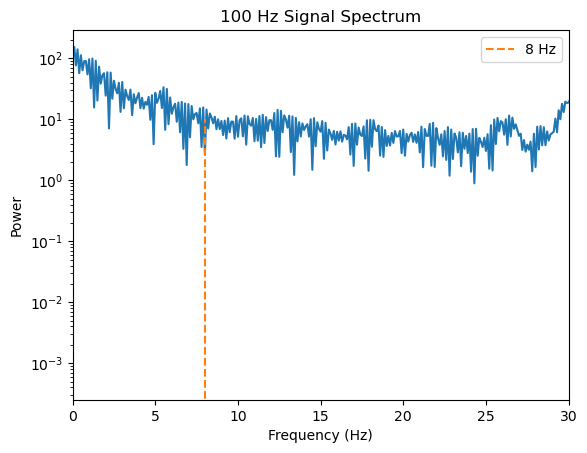

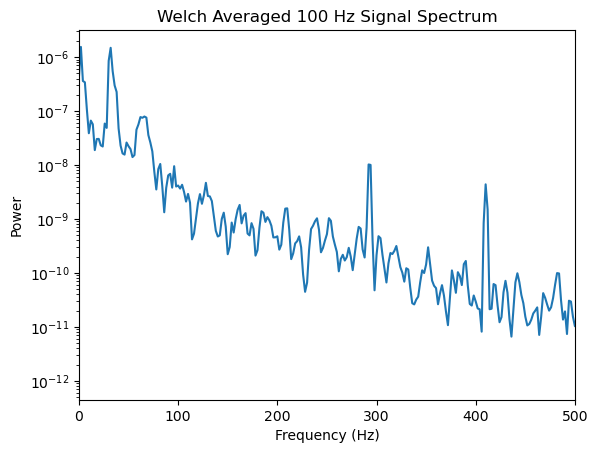

In [21]:
path = 'data/scan.csv'
data = pd.read_csv(path)

data_volts = data['Voltage (V)']
sample_rate = int(1e4)

# #display(data)
# plt.plot(data_volts[int(85.7e3):int(86e3)])
# plt.title('100 Hz Signal')
# plt.ylabel('Amplitude (V)')
# plt.xlabel('Samples')
# plt.show()

data_fft_power = np.fft.rfft(data_volts)
data_fft_freqs = np.fft.rfftfreq(len(data_volts),1./sample_rate)
plt.plot(data_fft_freqs, np.abs(data_fft_power))
plt.xlim(0,30)
plt.title('100 Hz Signal Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
#plt.plot([20,20], [0, 400], linestyle='--')
#plt.plot([40,40], [0, 400], linestyle='--')
plt.plot([8,8], [0, 10], linestyle='--', label='8 Hz')
#plt.plot([2,2], [0, 150], linestyle='--', label='100 Hz')
#plt.plot([200,200], [0, 8], linestyle='--', label ='200 Hz')
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.show()

data_fft_welch_freqs, data_fft_welch_power = welch(data_volts, sample_rate, nperseg=int(5e3))
plt.plot(data_fft_welch_freqs, data_fft_welch_power)
plt.xlim(0,500)
plt.title('Welch Averaged 100 Hz Signal Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.yscale('log')
plt.show()